In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

In [9]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):

    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5 + noise
    return X, y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

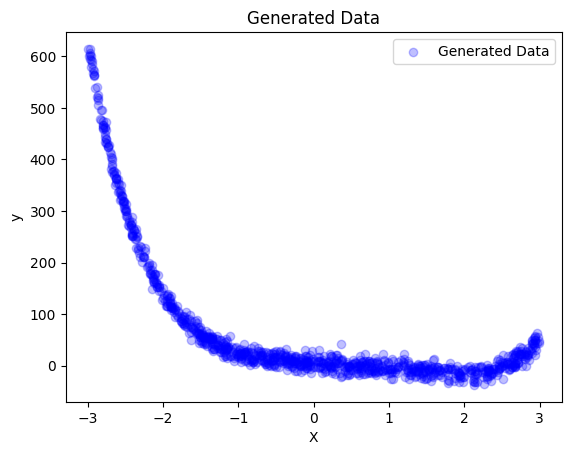

In [16]:
X, y = generate_dataset(-3, 3)


plt.scatter(X, y, color='blue', alpha=0.25, label = 'Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('synthetic polynomial Data with noise')
plt.legend()
plt.show()


In [17]:

X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size= 0.2, random_state=42)


X_out, y_out = generate_dataset(5, 7)
_, X_test_out_of_range, _, y_test_out_of_range = train_test_split(X_out, y_out, test_size= 0.2, random_state=42)

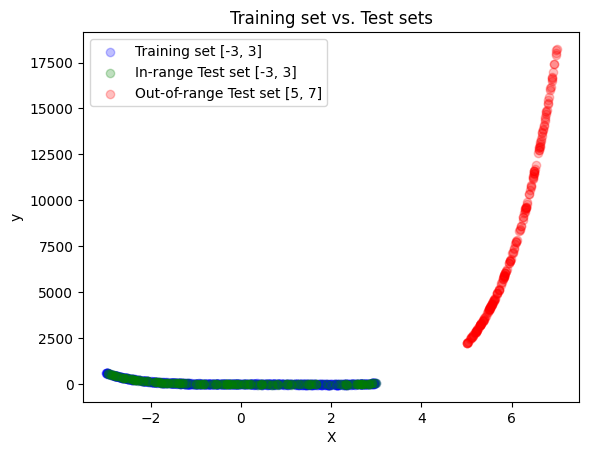

In [19]:

plt.scatter(X_train, y_train, color='blue', alpha=0.25, label = 'Training set [-3, 3]')
plt.scatter(X_test_in_range, y_test_in_range, color='green', alpha=0.25, label = 'In-range Test set [-3, 3]')
plt.scatter(X_test_out_of_range, y_test_out_of_range, color='red', alpha=0.25, label = 'Out-of-range Test set [5, 7]')
plt.legend()
plt.title('Training set vs. Test sets')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [22]:
def train_models(X, y, degree):

   features = PolynomialFeatures(degree=degree)
   lr = LinearRegression()
   model  = make_pipeline(features, lr)
   model.fit(X.reshape(-1, 1), y)
   return model



In [23]:
models = {}
degree = 9

for d in range(2, degree + 1):
  models[d] = train_models(X_train, y_train, d)


In [27]:
def evaluate_models(models, X_test, y_test):
    # Calculate MSE of each model (on the input test set).
    losses = {}
    for degree, model in models.items():
      y_pred = model.predict(X_test.reshape(-1, 1))
      losses[degree] = mean_squared_error(y_test, y_pred)

    return losses


In [30]:
#  Evaluate models on both the train and the test sets.
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)


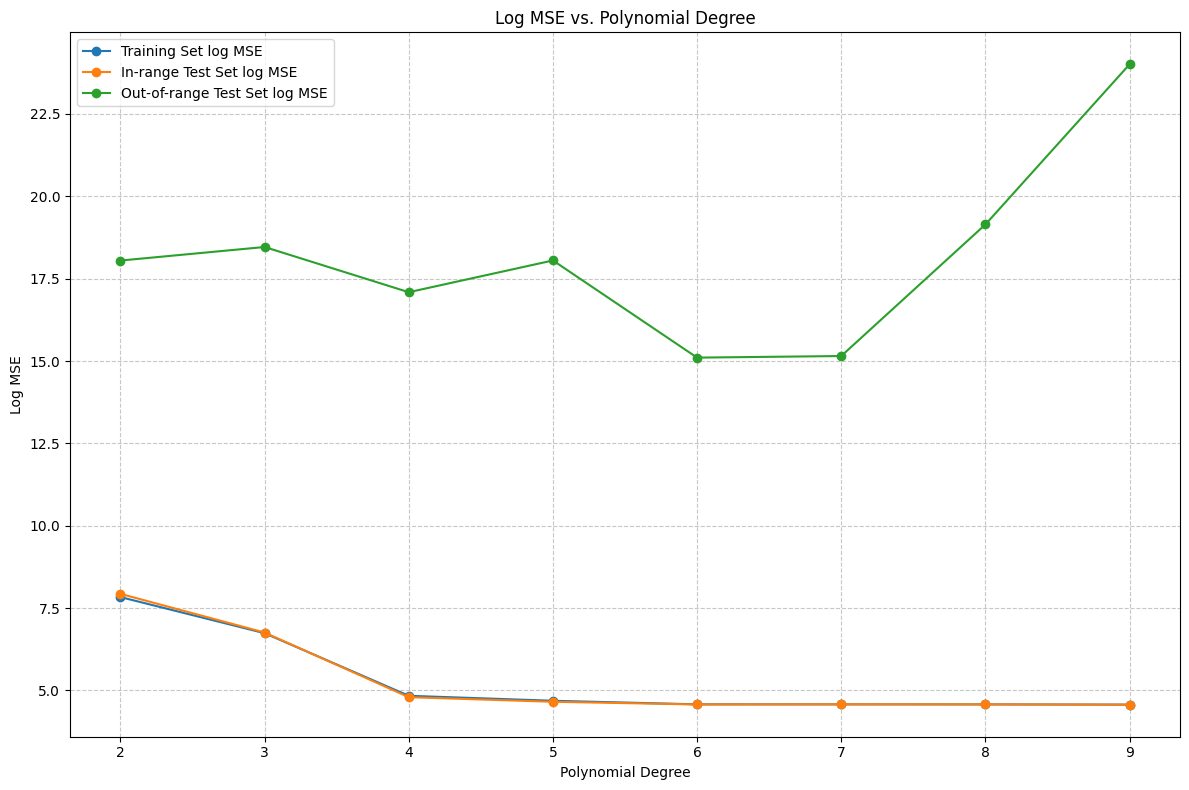

In [36]:
#  Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
log_losss_train = np.log1p(list(losses_train.values()))
log_losss_in_range = np.log1p(list(losses_in_range.values()))
log_losss_out_of_range = np.log1p(list(losses_out_of_range.values()))

degrees = range(2, degree + 1)

plt.figure(figsize=(12, 8))
plt.plot(degrees, list(log_losss_train), marker='o', linestyle='-', label='Training Set log MSE')
plt.plot(degrees, list(log_losss_in_range), marker= 'o', linestyle='-', label='In-range Test Set log MSE')
plt.plot(degrees, list(log_losss_out_of_range), marker='o', linestyle='-', label='Out-of-range Test Set log MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Log MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(degrees)
plt.tight_layout()
plt.show()

# TODO: Plot the log MSE results


In [42]:
 ##Print each model loss on the training and the two test sets
print(f"{'Degree':<10}{'Train MSE':<20}{'InRange Test MSE':<20}{'Out of Range Test MSE':<20}")
for i in range(degree - 1):
  print(f"{i + 2:<10}{log_losss_train[i]:<20.2f}{log_losss_in_range[i]:<20.2f}{log_losss_out_of_range[i]:<20.2f}")

Degree    Train MSE           InRange Test MSE    Out of Range Test MSE
2         7.83                7.93                18.05               
3         6.74                6.76                18.46               
4         4.84                4.79                17.09               
5         4.69                4.66                18.05               
6         4.58                4.57                15.10               
7         4.58                4.58                15.15               
8         4.58                4.58                19.15               
9         4.57                4.57                24.01               


- <span style="color:cyan;">**Observation:** </span>As the polynomial degree increases, the model tends to overfit the training data, leading to lower training loss but higher test loss, especially in the out of range test set. This demonstrats the bias-variance trade off: lower bias better training fit results in higher varience (poor generalization to unseen data) the challenge is finding balance where the model performs well on both training and test sets.
